In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,ShuffleSplit,train_test_split,cross_val_score
from sklearn import metrics,preprocessing,datasets,tree
import matplotlib.pylab as plt
from pandas import DataFrame
from sklearn.utils import shuffle 

In [2]:
# load data for training set
data = np.genfromtxt("by18.txt", dtype = float )
data = data.T

depth = data[0]
CALI = data[1]
GR = data[3]
RILD = data[4]
RILM = data[5]
CNL = data[8]
PEF = data[9]
RHOB = data[10]
RSFL = data[11]
SP = data[13]


df = DataFrame(
    {
#      'Depth' : depth,
     'Caliper': CALI,
     'Gamma Ray' : GR,
     'Deep Induction Resistivity' : RILD,
     'Medium Induction Resistivity': RILM,
     'Neutron Porosity (phi)' : CNL,
     'Formation Density' : RHOB,
     'Photoelectric Effect' : PEF,
     'Spherically Focused Resistivity' :RSFL,
     'Spontaneous Potential' : SP
    })

df.index = [depth]

target = ['']*len(depth)
for idx in range(len(depth)):
    target[idx]= 'no'

for idx in range((5670-4700)*2,(5740-4700)*2):
    target[idx]= 'yes'
for idx in range((5508-4700)*2,(5520-4700)*2):
    target[idx]= 'yes'
for idx in range((5571-4700)*2,(5582-4700)*2):
    target[idx]= 'yes'
for idx in range((5600-4700)*2,(5612-4700)*2):
    target[idx]= 'yes'
for idx in range((5310-4700)*2,(5332-4700)*2):
    target[idx]= 'yes'
for idx in range((5189-4700)*2,(5198-4700)*2):
    target[idx]= 'yes' 

df.index = [depth]
df['Target'] = target

df = df.dropna(axis=0,how='any')
df = shuffle(df)

In [3]:
# load data for test set
data = np.genfromtxt("by15.txt", dtype = float )
data = data.T

depth = data[0]
CALI = data[1]
GR = data[2]
CNL = data[3]
PEF = data[4]
RILD = data[5]
RHOB = data[6]
RILM = data[7]
RSFL = data[8]
SP = data[9]

df2 = DataFrame(
    {
#      'Depth' : depth,
     'Caliper': CALI,
     'Gamma Ray' : GR,
     'Deep Induction Resistivity' : RILD,
     'Medium Induction Resistivity': RILM,
     'Neutron Porosity (phi)' : CNL,
     'Formation Density' : RHOB,
     'Photoelectric Effect' : PEF,
     'Spherically Focused Resistivity' :RSFL,
     'Spontaneous Potential' : SP
    })

df2.index = [depth]

target = ['']*len(depth)
for idx in range(len(depth)):
    target[idx]= 'no'

for idx in range((5729-4600)*2,(5764-4600)*2):
    target[idx]= 'yes'
for idx in range((5616-4600)*2,(5626-4600)*2):
    target[idx]= 'yes'
for idx in range((5641-4600)*2,(5646-4600)*2):
    target[idx]= 'yes'
for idx in range((5357-4600)*2,(5364-4600)*2):
    target[idx]= 'yes'
for idx in range((5381-4600)*2,(5387-4600)*2):
    target[idx]= 'yes'
for idx in range((5225-4600)*2,(5235-4600)*2):
    target[idx]= 'yes'

df2.index = [depth]
df2['Target'] = target

df2 = df2.dropna(axis=0,how='any')
df2 = shuffle(df2)

In [4]:
# split
# X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df['Target'],test_size=0.2)
# y_train
X_train, X_test, y_train, y_test = df.iloc[:,:-1],df2.iloc[:,:-1],df['Target'],df2['Target']

# Decision Tree

In [5]:
# # create model
# clf = tree.DecisionTreeClassifier()  
# clf.fit(X_train, y_train)  
# y_pred = clf.predict(X_test)
# # metrics.roc_auc_score(y_test,y_pred)
# print(metrics.accuracy_score(y_test, y_pred))
# print(y_pred)

# Random Forest

In [6]:
scores = [0]*200
for i in range(200):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores[i] = metrics.accuracy_score(y_test, y_pred)
#     print(metrics.accuracy_score(y_test, y_pred))

In [7]:
scores = np.array(scores)
print('mean: ',scores.max())
print('avg: ',scores.mean())
print(clf.feature_importances_)
# print(y_pred)
print(clf)

mean:  0.9534246575342465
avg:  0.9310684931506849
[0.3169533  0.13394313 0.03684764 0.14856768 0.02924977 0.02063969
 0.06764829 0.0390927  0.2070578 ]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [8]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

         no       0.97      0.96      0.97      2054
        yes       0.49      0.52      0.50       136

avg / total       0.94      0.94      0.94      2190

Confusion matrix, without normalization
[[1979   65]
 [  75   71]]


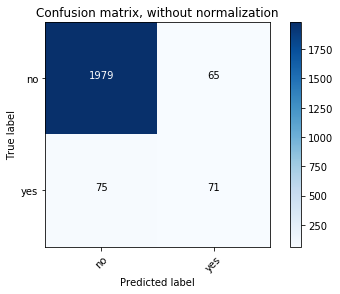

no     2044
yes     146
Name: Target, dtype: int64
[0.32 0.13 0.04 0.15 0.03 0.02 0.07 0.04 0.21]


In [9]:
# report
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test, target_names=['no','yes']))
from sklearn.metrics import confusion_matrix

# compute confusion matrix
cm = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['no','yes'],
                      title='Confusion matrix, without normalization')
plt.show()

print(y_test.value_counts())
print(clf.feature_importances_)

In [10]:
# parameter search
# param_test4 = {'n_estimators':range(10,51,10),'max_depth':range(2,10), 'min_samples_split':range(2,10),'min_samples_leaf':range(1,61,10)}
# gsearch4 = GridSearchCV(estimator = clf,
#                         param_grid = param_test4,
#                         scoring='accuracy',
#                         cv=5)
# gsearch4.fit(X_train, y_train)
# print(gsearch4.best_params_)
# print(gsearch4.best_score_)

In [11]:
# clf = RandomForestClassifier(n_estimators=10,max_depth=9,min_samples_leaf=1,min_samples_split=3)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print(metrics.accuracy_score(y_test, y_pred))
# print(clf.feature_importances_)
# print(y_pred)
# print(clf)

In [12]:
scores = []
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)

             precision    recall  f1-score   support

         no       0.98      0.96      0.97      2091
        yes       0.45      0.66      0.53        99

avg / total       0.96      0.95      0.95      2190

mean:  0.9474885844748858
avg:  0.9474885844748858
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
Confusion matrix, without normalization
[[2010   34]
 [  81   65]]


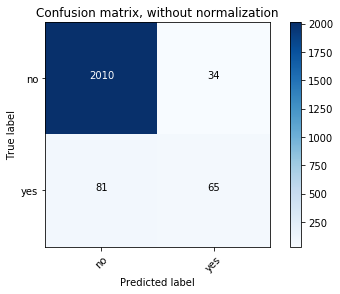

In [14]:
print(classification_report(y_pred, y_test, target_names=['no','yes']))
scores = np.array(scores)
print('mean: ',scores.max())
print('avg: ',scores.mean())
print(clf)

# compute confusion matrix
cm = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['no','yes'],
                      title='Confusion matrix, without normalization')
plt.show()

In [16]:
print('diff between yes and no: ',len(df[df['Target']=='no']),len(df[df['Target']=='yes']))

diff between yes and no:  1808 225


# PCA version

In [ ]:
# load data for training set
data = np.genfromtxt("by18.txt", dtype = float )
# data = data.T
data = np.delete(data, [2,6,7,12], axis=1)

df = DataFrame(data)
df.index = df.iloc[:,0]
del df[0]

target = ['']*len(data[:,0])
for idx in range(len(data[:,0])):
    target[idx]= 'no'

for idx in range((5670-4700)*2,(5740-4700)*2):
    target[idx]= 'yes'
for idx in range((5508-4700)*2,(5520-4700)*2):
    target[idx]= 'yes'
for idx in range((5571-4700)*2,(5582-4700)*2):
    target[idx]= 'yes'
for idx in range((5600-4700)*2,(5612-4700)*2):
    target[idx]= 'yes'
for idx in range((5310-4700)*2,(5332-4700)*2):
    target[idx]= 'yes'
for idx in range((5189-4700)*2,(5198-4700)*2):
    target[idx]= 'yes' 

df['Target'] = target
df = df.dropna(axis=0,how='any')
target = df['Target']
del df['Target']

df = shuffle(df)
len(df)

In [ ]:
# load data for test set
data = np.genfromtxt("by15.txt", dtype = float )
# data = data.T

df2 = DataFrame(data)

df2.index = df2.iloc[:,0]
del df2[0]

target2 = ['']*len(data[:,0])
for idx in range(len(data[:,0])):
    target2[idx]= 'no'

for idx in range((5729-4600)*2,(5764-4600)*2):
    target2[idx]= 'yes'
for idx in range((5616-4600)*2,(5626-4600)*2):
    target2[idx]= 'yes'
for idx in range((5641-4600)*2,(5646-4600)*2):
    target2[idx]= 'yes'
for idx in range((5357-4600)*2,(5364-4600)*2):
    target2[idx]= 'yes'
for idx in range((5381-4600)*2,(5387-4600)*2):
    target2[idx]= 'yes'
for idx in range((5225-4600)*2,(5235-4600)*2):
    target2[idx]= 'yes'

df2['Target'] = target2
df2 = df2.dropna(axis=0,how='any')
target2 = df2['Target']
del df2['Target']

df2 = shuffle(df2)
len(df2)

In [ ]:
# from sklearn.decomposition import PCA
df_all = df.append(df2).values
# # X -= np.mean(X, axis = 0) # zero mean
# # df_all.convert_objects(convert_numeric=True)
# pca = PCA(n_components=3)
# # pca = pca.fit(df_all)
# df_all_reduced = pca.fit_transform(df_all)
# df_all_reduced.shape
df_all_reduced = df_all

In [ ]:
# split data
df = pd.DataFrame(df_all_reduced[:len(df)])
df2 = pd.DataFrame(df_all_reduced[len(df):])
X_train, X_test, y_train, y_test = df.iloc[:,:-1],df2.iloc[:,:-1],target,target2

In [ ]:
scores = []
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_pred, y_test, target_names=['no','yes']))
scores = np.array(scores)
print('mean: ',scores.max())
print('avg: ',scores.mean())
# print(clf.feature_importances_)
# print(y_pred)
print(clf)